In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sd(chisq, df)

## Data Exploration
This data consists of only two independent variables, with the goal of prediction the third variable `Admitted`.

In [2]:
raw_data = pd.read_csv('College_Admissions.csv')
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})

## Modeling
We will first try one variable

In [4]:
x_1 = data['Gender']
y = data['Admitted']

In [5]:
x = sm.add_constant(x_1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.1659
Time:                        19:38:45   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

We can see that the `Log-likelihood` is adequate and higher than the `LL-Null`. The `LLR p-value` (log-likelihood ratio) is also quite small (<0.05) as well as the single dependent variable; indicating model and feature significance.

Note: The `Logit` is the same as the `Logistic`, just a further transformation on the equation to yield an equation more similar to the linear form.

Since we assigned `Female` to the integer value 1, `Male` is our benchmark value. The `Gender` variable coefficient is 2.07, meaning that females are 7.99 times more likely to be admitted to college.

Let us add the `SAT` score variable

In [7]:
x_2 = data[['Gender', 'SAT']]
y = data['Admitted']

x = sm.add_constant(x_2)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.8249
Time:                        19:45:58   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We can see that the `Log-likelihood` is even higher, indicating that the addition of the `SAT` variable helped the model.

## Evaluating

In [11]:
# the model training set predictions
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [12]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

We can visualize the confusion matrix

In [14]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


Calculating the accuracy

In [15]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0] + cm[1,1]) / cm.sum()
accuracy_train

0.9464285714285714

## Visualizing the decision boundary
For this bit we will use sklearn and a new points csv

In [17]:
pts = np.loadtxt('linpts.txt')
X = pts[:,:2]
Y = pts[:,2].astype('int')

In [ ]:
clf = LogisticRegression()
clf.fit(X, Y)

In [22]:
# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

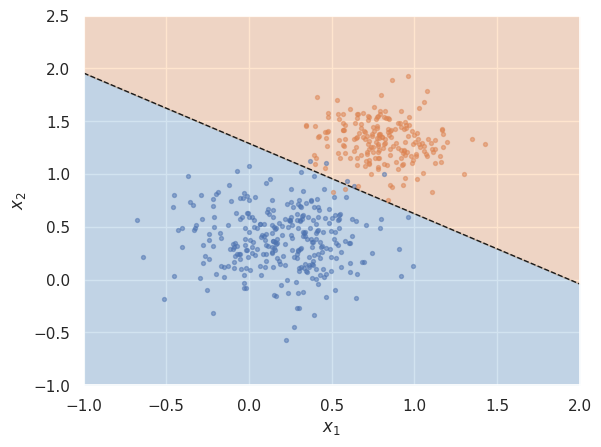

In [24]:
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[Y==0].T, s=8, alpha=0.5)
plt.scatter(*X[Y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()